The fifth edition of Dungeons & Dragons introduced a system of “advantage and disadvantage.” When you roll a die “with advantage,” you roll the die twice and keep the higher result. Rolling “with disadvantage” is similar, except you keep the lower result instead. The rules further specify that when a player rolls with both advantage and disadvantage, they cancel out, and the player rolls a single die. Yawn!

There are two other, more mathematically interesting ways that advantage and disadvantage could be combined.

- First, you could have “advantage of disadvantage,” meaning you roll twice with disadvantage and then keep the higher result.
- Or, you could have “disadvantage of advantage,” meaning you roll twice with advantage and then keep the lower result.

With a fair 20-sided die, which situation produces the highest expected roll: advantage of disadvantage, disadvantage of advantage or rolling a single die?

Extra Credit: Instead of maximizing your expected roll, suppose you need to roll N or better with your 20-sided die. For each value of N, is it better to use advantage of disadvantage, disadvantage of advantage or rolling a single die?

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import pandas as pd

### Advantage of disadvantage:

One roll with disadvantage:

In [11]:
min(np.random.randint(1, 21, 2))

10

n rolls with disadvantage, turned into n//2 rolls of "advantage with disadvantage":

In [25]:
n = 40
disad_rolls = [min(i) for i in np.random.randint(1, 21, (n, 2))] # n rolls with disadvantage
[max(i) for i in np.reshape(disad_rolls, (n//2, 2))] # turn into n//2 rolls of "advantage with disadvantage"

[5, 8, 6, 9, 8, 6, 7, 11, 12, 15, 5, 16, 14, 5, 5, 8, 9, 12, 15, 5]

### Disadvantage of advantage:

In [26]:
ad_rolls = [max(i) for i in np.random.randint(1, 21, (n, 2))] # n rolls with advantage
[min(i) for i in np.reshape(ad_rolls, (n//2, 2))] # turn into n//2 rolls of "disadvantage with advantage"

[14, 14, 7, 6, 16, 7, 8, 15, 9, 7, 8, 17, 19, 18, 10, 15, 10, 4, 18, 18]

### Single roll:

In [92]:
np.random.randint(1, 21, n//2)

array([ 3, 14,  9,  6, 14,  4,  4, 16, 14, 12,  7,  1,  7,  1, 11,  7, 16,
       10,  5,  6])

### Compare them:

In [94]:
n = 100000

disad_rolls = [min(i) for i in np.random.randint(1, 21, (n, 2))] # n rolls with disadvantage
ad_disad = [max(i) for i in np.reshape(disad_rolls, (n//2, 2))] # turn into n//2 rolls of "advantage with disadvantage"

ad_rolls = [max(i) for i in np.random.randint(1, 21, (n, 2))] # n rolls with advantage
disad_ad = [min(i) for i in np.reshape(ad_rolls, (n//2, 2))] # turn into n//2 rolls of "disadvantage with advantage"

straight_rolls = np.random.randint(1, 21, n//2)

[Text(0, 0, 'Disad to ad'),
 Text(0, 0, 'Ad to disad'),
 Text(0, 0, 'Straight rolls')]

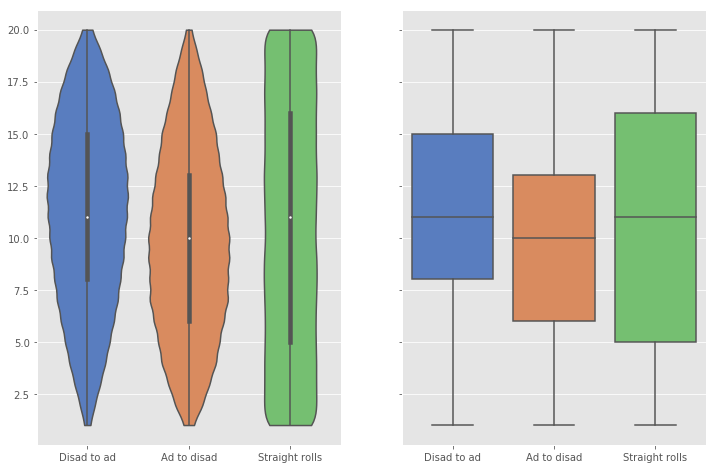

In [95]:
fig, ax = plt.subplots(1 ,2, figsize=(12, 8), sharey=True)
sns.violinplot(data=[disad_ad, ad_disad, straight_rolls], palette="muted", ax=ax[0], cut=0)
labels = ['Disad to ad', 'Ad to disad', 'Straight rolls']
ax[0].set_xticklabels(labels)
sns.boxplot(data=[disad_ad, ad_disad, straight_rolls], palette="muted", ax=ax[1])
ax[1].set_xticklabels(labels)